<a href="https://colab.research.google.com/github/dedemasutti/AI-projects/blob/master/object_tracking_Tensorflow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas

In [7]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import display, clear_output

Object tracking com tensorflow e OpenCV

1/1 [==============================] - 1s 783ms/step


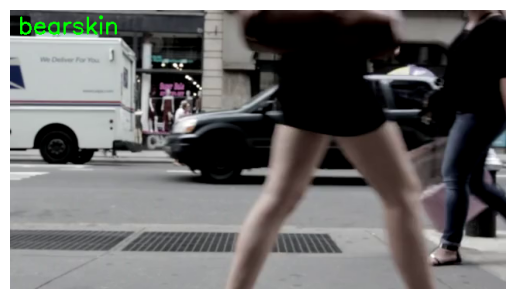

1/1 [==============================] - 0s 62ms/step


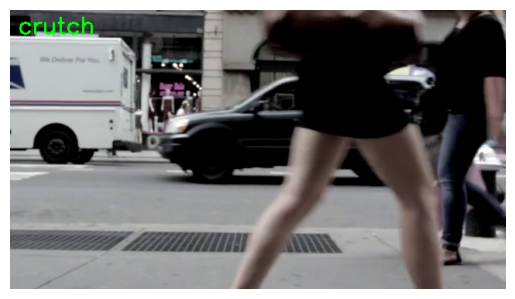

1/1 [==============================] - 0s 66ms/step


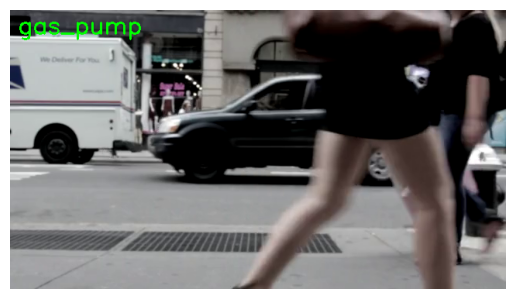

1/1 [==============================] - 0s 47ms/step


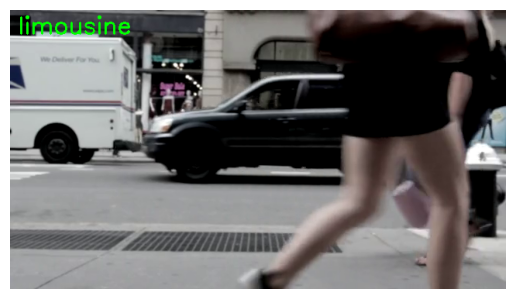

1/1 [==============================] - 0s 57ms/step


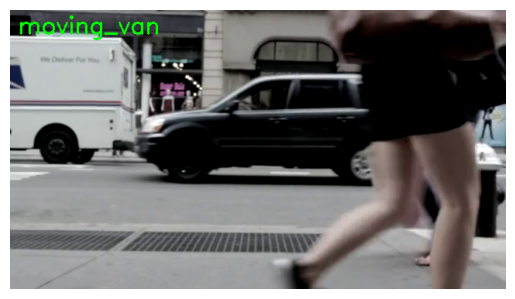

1/1 [==============================] - 0s 47ms/step


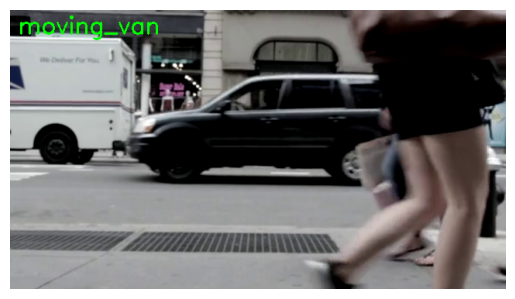

1/1 [==============================] - 0s 52ms/step


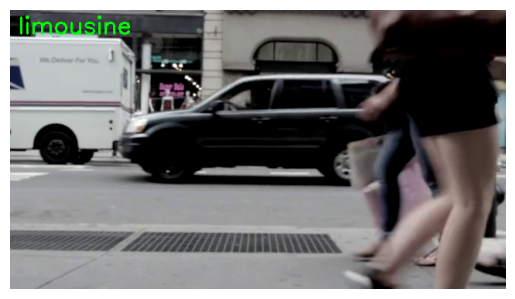

1/1 [==============================] - 0s 48ms/step


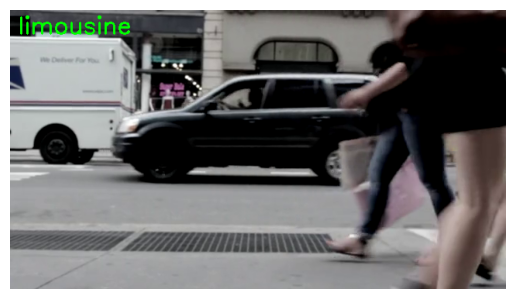

1/1 [==============================] - 0s 49ms/step


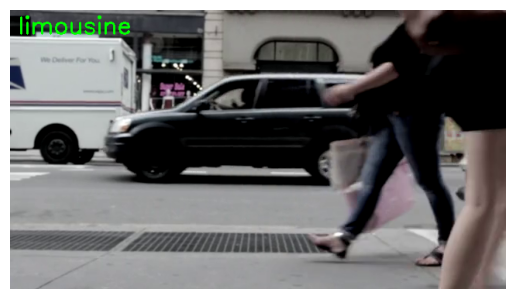

1/1 [==============================] - 0s 48ms/step


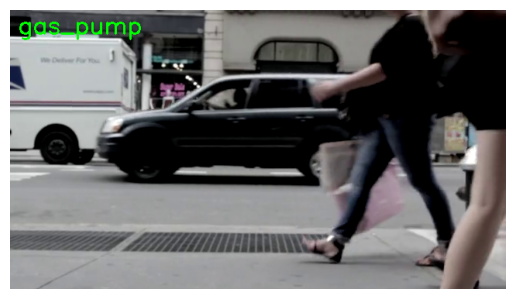

1/1 [==============================] - 0s 52ms/step


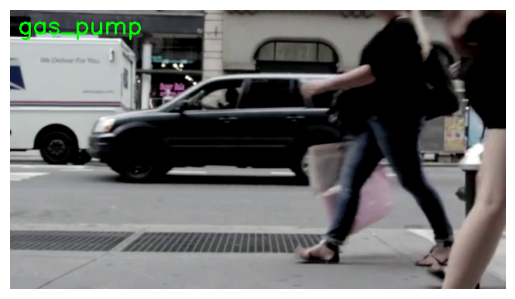

1/1 [==============================] - 0s 64ms/step


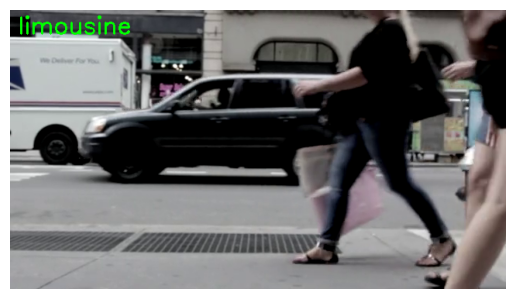

1/1 [==============================] - 0s 43ms/step


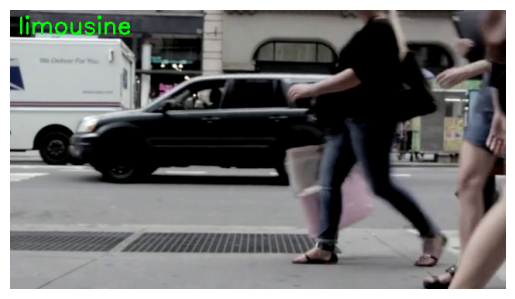

1/1 [==============================] - 0s 46ms/step


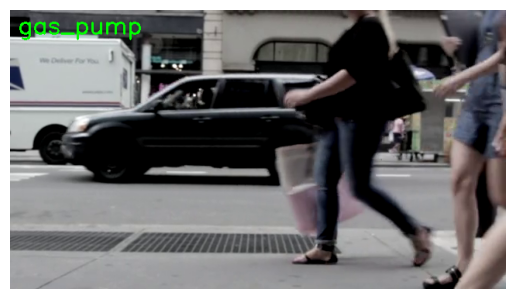

1/1 [==============================] - 0s 62ms/step


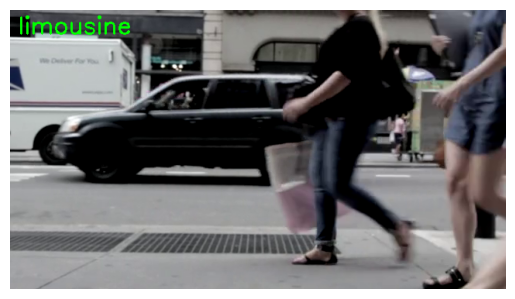

1/1 [==============================] - 0s 84ms/step


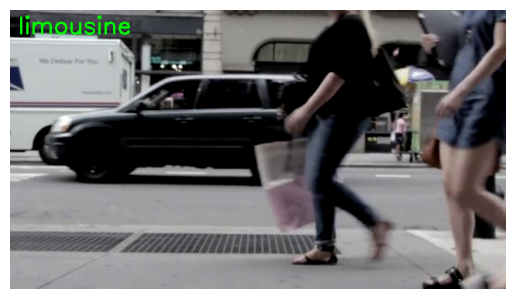

1/1 [==============================] - 0s 77ms/step


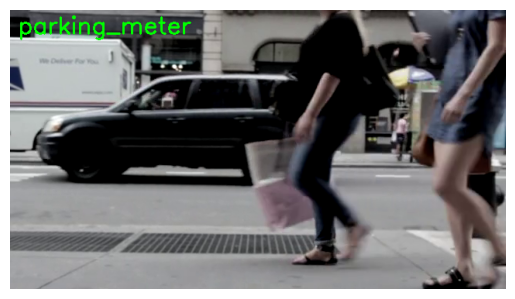

1/1 [==============================] - 0s 92ms/step


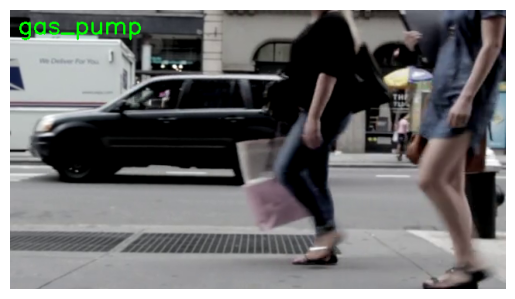

1/1 [==============================] - 0s 65ms/step


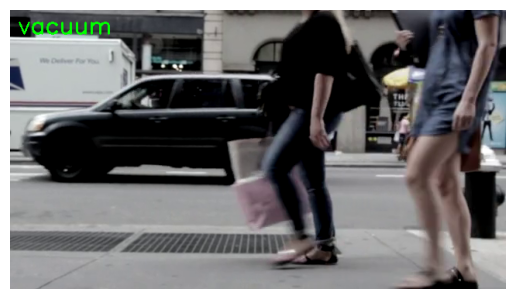

1/1 [==============================] - 0s 95ms/step


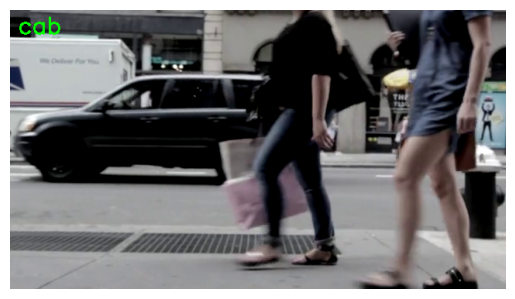

1/1 [==============================] - 0s 83ms/step


KeyboardInterrupt: ignored

In [8]:
# Carregar o modelo pré-treinado MobileNetV2
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# Definir a função para classificar um frame do vídeo
def classificar_frame(frame):
    # Redimensionar a imagem para o tamanho esperado do modelo (224x224 pixels)
    frame_resized = cv2.resize(frame, (224, 224))

    # Converter o frame para o formato esperado pelo modelo (float32 e normalizado)
    frame_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(frame_resized)

    # Adicionar uma dimensão extra para representar o batch_size
    frame_preprocessed = np.expand_dims(frame_preprocessed, axis=0)

    # Realizar a classificação do frame usando o modelo
    predictions = model.predict(frame_preprocessed)

    # Obter a classe com a maior probabilidade (índice do maior valor)
    predicted_class_index = np.argmax(predictions)

    # Obter o nome da classe usando o ID do ImageNet
    predicted_class_name = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0][0][1]

    return predicted_class_name

# Abrir o vídeo
video_capture = cv2.VideoCapture("/content/pedestrians_-_1023 (360p).mp4")

# Verificar se o vídeo foi aberto corretamente
if not video_capture.isOpened():
    print("Não foi possível abrir o vídeo.")
    exit()

while True:
    # Capturar o frame do vídeo
    ret, frame = video_capture.read()

    if not ret:
        break

    # Classifica o frame usando o modelo pré-treinado
    class_name = classificar_frame(frame)

    # Exibe a classe prevista no frame
    cv2.putText(frame, class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

   # Converte o frame para RGB (para exibição correta com matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Mostra o frame classificado usando matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Desativar eixos
    plt.show()

    # Pressione 'q' para sair do loop
    try:
      if cv2.waitKey(1) == ord('q'):
        break
    except KeyboardInterrupt:
      break


# Liberar recursos
video_capture.release()
cv2.destroyAllWindows()
